# Customer Lifetime Value

It represents the total predicted revenue a business can expect to earn from a customer throughout their entire relationship. CLV is a crucial metric for companies to assess the long-term value of acquiring and retaining customers. By understanding the potential profitability of each customer, businesses can make informed decisions about marketing strategies, customer service investments, and overall business growth. Calculating CLV involves considering factors such as customer acquisition costs, retention rates, and the average revenue generated per customer over time.

This project was reproduced using our own models.

In [1]:
import pandas as pd
from IPython.display import display

# Load sample data from CSV file
sample_data = pd.read_csv('ML portfolio/Artificial-Intelligence-for-Banking-master/99_sample_data/custclv.csv')

# Display the top 10 records in tabular form
print("Top 10 records of customer data:")
display(sample_data.head(10))

# Display column names and data types
print("\nColumn Names and Data Types:")
display(sample_data.dtypes)

# Display information about missing data
print("\nMissing Data Information:")
display(sample_data.isnull().sum())


Top 10 records of customer data:


,customer_id,rfm_score,Gender,Age,HouseType,ContactAvailability,HomeCountry,CreditScore,CLV,MonthlyValue,ActiveMonths
0,10235005,322,Male,18,Owned,Medium,Singapore,NaN,7.3780,3.689000,2
1,10238628,535,Male,37,Rented,Low,Singapore,NaN,399.1002,199.550100,2
2,10256519,545,Male,50,Owned,High,Singapore,NaN,534.6880,534.688000,1
3,10261907,213,Male,57,Owned,Low,Singapore,NaN,17.9180,17.918000,1
4,10269642,554,Male,28,Owned,High,Singapore,NaN,570.9394,142.734850,4
5,10282193,111,Male,50,Rented,High,Singapore,NaN,0.0000,0.000000,1
6,10285129,115,Male,38,Rented,High,Singapore,NaN,65.6084,65.608400,1
7,10294523,543,Male,46,Owned,High,Singapore,NaN,97.4826,32.494200,3
8,10307950,554,Female,38,Owned,Medium,Singapore,NaN,379.1300,126.376667,3
9,10308730,211,Female,8,Rented,High,Singapore,NaN,0.0000,0.000000,1



Column Names and Data Types:


customer_id              int64
rfm_score                int64
Gender                  object
Age                      int64
HouseType               object
ContactAvailability     object
HomeCountry             object
CreditScore            float64
CLV                    float64
MonthlyValue           float64
ActiveMonths             int64
dtype: object


Missing Data Information:


customer_id              0
rfm_score                0
Gender                   0
Age                      0
HouseType                0
ContactAvailability      0
HomeCountry              0
CreditScore            446
CLV                      0
MonthlyValue             0
ActiveMonths             0
dtype: int64

In [58]:
# Import necessary libraries
from h2o.estimators.kmeans import H2OKMeansEstimator
import h2o
import pandas as pd

# Initialize H2O
h2o.init()

# Define predictors/features for the model
predictors = ['rfm_score', 'Gender', 'Age', 'HouseType', 'ContactAvailability', 'HomeCountry',
              'CreditScore', 'CLV', 'MonthlyValue', 'ActiveMonths']

# Data Cleaning: Convert categorical variables to numeric codes
# Note: Corrected 'ContactAvaliability' to 'ContactAvailability'
sample_data['Gender'] = pd.Categorical(sample_data.Gender).codes
sample_data['ContactAvailability'] = pd.Categorical(sample_data.ContactAvailability).codes
sample_data['HouseType'] = pd.Categorical(sample_data.HouseType).codes
sample_data['HomeCountry'] = pd.Categorical(sample_data.HomeCountry).codes

# Convert the cleaned DataFrame to H2OFrame
sample_data_h2o = h2o.H2OFrame(sample_data)
sample_data_h2o_test = sample_data_h2o


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,56 mins 43 secs
H2O_cluster_timezone:,Atlantic/Reykjavik
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_tebri_aq60g1
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.893 Gb
H2O_cluster_total_cores:,20
H2O_cluster_allowed_cores:,20
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [61]:
# Convert the cleaned DataFrame to H2OFrame
sample_data_h2o = h2o.H2OFrame(sample_data)

# Initialize the KMeans Estimator with specified parameters
estimator = H2OKMeansEstimator(k=4, init="Random", seed=2, standardize=True, categorical_encoding='auto')

# Train the KMeans model on the H2OFrame using the specified predictors
estimator.train(x=predictors, training_frame=sample_data_h2o)

# Make predictions using the trained model on the same dataset
trained = estimator.predict(sample_data_h2o)

# Add a new column 'cluster' to the original H2OFrame with the predicted cluster labels
sample_data_h2o['cluster'] = trained["predict"].asfactor()

# Convert the H2OFrame back to a Pandas DataFrame for visualization
sample_data_h20 = sample_data_h2o.as_data_frame()

# Display the first 10 rows of the DataFrame to visualize the output
sample_data_h20.head(10)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


C:\Users\tebri\AppData\Local\Programs\Python\Python311\Lib\site-packages\h2o\estimators\estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [CreditScore, HomeCountry]
  warnings.warn(mesg["message"], RuntimeWarning)


kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%
kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%


,customer_id,rfm_score,Gender,Age,HouseType,ContactAvailability,HomeCountry,CreditScore,CLV,MonthlyValue,ActiveMonths,cluster
0,10235005,322,1,18,0,2,0,NaN,7.3780,3.689000,2,3
1,10238628,535,1,37,1,1,0,NaN,399.1002,199.550100,2,2
2,10256519,545,1,50,0,0,0,NaN,534.6880,534.688000,1,1
3,10261907,213,1,57,0,1,0,NaN,17.9180,17.918000,1,3
4,10269642,554,1,28,0,0,0,NaN,570.9394,142.734850,4,1
5,10282193,111,1,50,1,0,0,NaN,0.0000,0.000000,1,0
6,10285129,115,1,38,1,0,0,NaN,65.6084,65.608400,1,0
7,10294523,543,1,46,0,0,0,NaN,97.4826,32.494200,3,1
8,10307950,554,0,38,0,2,0,NaN,379.1300,126.376667,3,1
9,10308730,211,0,8,1,0,0,NaN,0.0000,0.000000,1,0


In [62]:
# For a new customer
sample_customer = sample_data_h2o_test[2, :]  # Selecting the third row (index 2) as an example

# Predict the cluster for the new customer using the trained model
predicted = estimator.predict(sample_customer)
print("Predicted Cluster: ", predicted["predict"].asfactor())

# Extract the predicted cluster value
predicted_cluster = int(predicted["predict"].asfactor())

# Filter the data for the cluster to which the new customer belongs
req_data = sample_data_h20[sample_data_h20['cluster'] == predicted_cluster]

# Calculate the average CLV and RFM for that cluster
avg_clv = req_data['CLV'].mean()
avg_RFM = req_data['rfm_score'].mean()

# Display the predicted CLV and RFM for the new customer
print('CLV for new customer = ', str(avg_clv))
print('RFM for new customer = ', str(int(avg_RFM)))


kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
Predicted Cluster:    predict
        1
[1 row x 1 column]

CLV for new customer =  723.23124
RFM for new customer =  485


In [63]:
def persona_estimator(new_customer, cluster_data):
    """
    Estimate the persona of a new customer based on the cluster.

    Parameters:
    - new_customer: H2OFrame row representing the new customer
    - cluster_data: DataFrame containing customer data for the predicted cluster

    Returns:
    - persona: Dictionary representing the persona of the new customer
    """
    # Extract relevant information from the new customer
    predicted_cluster = int(estimator.predict(new_customer)["predict"].asfactor())
    
    # Filter data for the predicted cluster
    cluster_info = cluster_data[cluster_data['cluster'] == predicted_cluster]

    # Calculate average values for persona attributes
    avg_age = cluster_info['Age'].mean()
    avg_credit_score = cluster_info['CreditScore'].mean()
    avg_monthly_value = cluster_info['MonthlyValue'].mean()

    # Build the persona dictionary
    persona = {
        'Predicted Cluster': predicted_cluster,
        'Average Age': avg_age,
        'Average Credit Score': avg_credit_score,
        'Average Monthly Value': avg_monthly_value
        # Add more attributes as needed
    }

    return persona

# Use the persona_estimator function
new_customer_persona = persona_estimator(sample_customer, sample_data_h20)

# Display the estimated persona for the new customer
print(new_customer_persona)


kmeans prediction progress: |████████████████████████████████████████████████████| (done) 100%
{'Predicted Cluster': 1, 'Average Age': 33.7125, 'Average Credit Score': nan, 'Average Monthly Value': 346.301706541875}


The output provided is the estimated persona for the new customer based on the KMeans clustering. Let's break down the key information:

Predicted Cluster: 1: The new customer has been assigned to Cluster 1 based on the KMeans clustering algorithm.

Average Age: 33.7125: This is the average age of customers in Cluster 1. The new customer is estimated to have a similar age to the average age of customers in this cluster.

Average Credit Score: nan: The output shows 'nan,' which typically stands for "Not a Number." This could mean that there might be missing or undefined values for the 'CreditScore' attribute in the cluster data. You may need to handle missing values in your dataset or investigate why there are missing values for this attribute.

Average Monthly Value: 346.301706541875: This is the average monthly value of customers in Cluster 1. The new customer is estimated to have a similar spending pattern to the average monthly spending of customers in this cluster.

It's worth noting that the persona is based on the characteristics of customers in the predicted cluster and provides insights into what the average customer in that cluster looks like.

# Predict the next amount to be paid and the time to the next payment 

In [2]:
# Assuming you are using Jupyter Notebook or a similar environment
import pandas as pd
from IPython.display import display

# Read the CSV file into a DataFrame
sample_case2_data = pd.read_csv('ML portfolio/Artificial-Intelligence-for-Banking-master/99_sample_data/customerpreddata.csv')

# Display the first 10 rows of the DataFrame
display(sample_case2_data.head(10))


,AccountNo,Gender,Age,HouseType,ContactAvailability,HomeCountry,CreditScore,CardExpiryDate,TransactionCountry,LargePurchase,Product,TransactionCurrencyCode,date_diff,Card_Age,Week_Segment,TransactionAmount,lag_Datediff,lag_Txamt
0,1308303,Female,56,Owned,Medium,Singapore,1,1908,Singapore,0,1,SGD,0,300,WEEKDAY,12.400,0.0,3.100
1,1308303,Female,56,Owned,Medium,Singapore,1,1908,Singapore,0,1,SGD,0,305,WEEKEND,3.100,5.0,1.240
2,1308303,Female,56,Owned,Medium,Singapore,1,1908,Singapore,0,1,SGD,5,305,WEEKEND,1.240,2.0,6.200
3,1563687,Male,49,Owned,Low,Singapore,1,2003,Singapore,0,1,SGD,0,130,WEEKEND,10.044,256.0,8.680
4,1563687,Male,49,Owned,Low,Singapore,1,2003,Singapore,0,1,SGD,256,386,WEEKDAY,8.680,NaN,NaN
5,7131505,Male,57,Owned,Medium,Singapore,1,2006,Singapore,0,1,SGD,0,59,WEEKDAY,25.420,0.0,25.420
6,7131505,Male,57,Owned,Medium,Singapore,1,2006,Singapore,0,1,SGD,0,59,WEEKDAY,25.420,0.0,25.420
7,7131505,Male,57,Owned,Medium,Singapore,1,2006,Singapore,0,1,SGD,0,59,WEEKDAY,25.420,0.0,17.050
8,7131505,Male,57,Owned,Medium,Singapore,1,2006,Singapore,0,1,SGD,0,59,WEEKDAY,17.050,109.0,4.743
9,7150411,Male,54,Owned,Medium,Singapore,1,2007,Singapore,0,1,SGD,0,93,WEEKEND,9.579,0.0,9.579


In [3]:
sample_case2_data.shape

(141, 18)

In [4]:
# Display column types
print("Column Types:")
print(sample_case2_data.dtypes)

# Display shape of the data (number of rows and columns)
print("\nShape of Data:")
print(sample_case2_data.shape)

# Check for missing data
print("\nMissing Data:")
print(sample_case2_data.isnull().sum())


Column Types:
AccountNo                    int64
Gender                      object
Age                          int64
HouseType                   object
ContactAvailability         object
HomeCountry                 object
CreditScore                  int64
CardExpiryDate               int64
TransactionCountry          object
LargePurchase                int64
Product                      int64
TransactionCurrencyCode     object
date_diff                    int64
Card_Age                     int64
Week_Segment                object
TransactionAmount          float64
lag_Datediff               float64
lag_Txamt                  float64
dtype: object

Shape of Data:
(141, 18)

Missing Data:
AccountNo                  0
Gender                     0
Age                        0
HouseType                  0
ContactAvailability        0
HomeCountry                0
CreditScore                0
CardExpiryDate             0
TransactionCountry         0
LargePurchase              0
Product    

In [5]:
# Handle missing values

# For numerical columns, fill missing values with the mean
sample_case2_data['lag_Datediff'].fillna(sample_case2_data['lag_Datediff'].mean(), inplace=True)
sample_case2_data['lag_Txamt'].fillna(sample_case2_data['lag_Txamt'].mean(), inplace=True)

# Display the updated dataset
display(sample_case2_data)


,AccountNo,Gender,Age,HouseType,ContactAvailability,HomeCountry,CreditScore,CardExpiryDate,TransactionCountry,LargePurchase,Product,TransactionCurrencyCode,date_diff,Card_Age,Week_Segment,TransactionAmount,lag_Datediff,lag_Txamt
0,1308303,Female,56,Owned,Medium,Singapore,1,1908,Singapore,0,1,SGD,0,300,WEEKDAY,12.40000,0.000000,3.10000
1,1308303,Female,56,Owned,Medium,Singapore,1,1908,Singapore,0,1,SGD,0,305,WEEKEND,3.10000,5.000000,1.24000
2,1308303,Female,56,Owned,Medium,Singapore,1,1908,Singapore,0,1,SGD,5,305,WEEKEND,1.24000,2.000000,6.20000
3,1563687,Male,49,Owned,Low,Singapore,1,2003,Singapore,0,1,SGD,0,130,WEEKEND,10.04400,256.000000,8.68000
4,1563687,Male,49,Owned,Low,Singapore,1,2003,Singapore,0,1,SGD,256,386,WEEKDAY,8.68000,6.086331,26.74067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,1100689,Male,6,Owned,Medium,Singapore,1,2007,Singapore,0,1,SGD,0,826,WEEKDAY,6.80450,12.000000,0.02325
137,1100689,Male,6,Owned,Medium,Singapore,1,2007,Singapore,0,1,SGD,12,838,WEEKDAY,0.02325,0.000000,3.10000
138,1100689,Male,6,Owned,Medium,Singapore,1,2007,Singapore,0,1,SGD,0,838,WEEKDAY,3.10000,0.000000,0.00000
139,1100689,Male,6,Owned,Medium,Singapore,1,2007,Singapore,0,1,SGD,0,840,WEEKDAY,0.00000,2.000000,5.03130


In [6]:
# One-hot encode categorical columns
sample_case2_data_encoded = pd.get_dummies(sample_case2_data, columns=['Gender', 'HouseType', 'ContactAvailability', 'HomeCountry', 'TransactionCountry', 'TransactionCurrencyCode', 'Week_Segment'])

# Display the updated dataset after encoding
display(sample_case2_data_encoded)


,AccountNo,Age,CreditScore,CardExpiryDate,LargePurchase,Product,date_diff,Card_Age,TransactionAmount,lag_Datediff,...,Gender_Female,Gender_Male,HouseType_Owned,ContactAvailability_Low,ContactAvailability_Medium,HomeCountry_Singapore,TransactionCountry_Singapore,TransactionCurrencyCode_SGD,Week_Segment_WEEKDAY,Week_Segment_WEEKEND
0,1308303,56,1,1908,0,1,0,300,12.40000,0.000000,...,True,False,True,False,True,True,True,True,True,False
1,1308303,56,1,1908,0,1,0,305,3.10000,5.000000,...,True,False,True,False,True,True,True,True,False,True
2,1308303,56,1,1908,0,1,5,305,1.24000,2.000000,...,True,False,True,False,True,True,True,True,False,True
3,1563687,49,1,2003,0,1,0,130,10.04400,256.000000,...,False,True,True,True,False,True,True,True,False,True
4,1563687,49,1,2003,0,1,256,386,8.68000,6.086331,...,False,True,True,True,False,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,1100689,6,1,2007,0,1,0,826,6.80450,12.000000,...,False,True,True,False,True,True,True,True,True,False
137,1100689,6,1,2007,0,1,12,838,0.02325,0.000000,...,False,True,True,False,True,True,True,True,True,False
138,1100689,6,1,2007,0,1,0,838,3.10000,0.000000,...,False,True,True,False,True,True,True,True,True,False
139,1100689,6,1,2007,0,1,0,840,0.00000,2.000000,...,False,True,True,False,True,True,True,True,True,False


In [7]:
# Define the target variables and column to drop
target_timing_variable = 'date_diff'  # Replace with the actual column name for timing prediction
target_amount_variable = 'TransactionAmount'  # Replace with the actual column name for amount prediction
columns_to_drop = ['AccountNo', target_timing_variable, target_amount_variable]

# Separate features and target variable for timing prediction
X_timing = sample_case2_data_encoded.drop(columns=columns_to_drop)
y_timing = sample_case2_data_encoded[target_timing_variable]

# Separate features and target variable for amount prediction
X_amount = sample_case2_data_encoded.drop(columns=columns_to_drop)
y_amount = sample_case2_data_encoded[target_amount_variable]


Ranked Features for Timing Prediction:
ContactAvailability_Low         0.215500
ContactAvailability_Medium      0.206463
Card_Age                        0.198036
lag_Txamt                       0.165298
lag_Datediff                    0.100304
Week_Segment_WEEKDAY            0.067457
Week_Segment_WEEKEND            0.034485
CardExpiryDate                  0.010873
Age                             0.000929
Gender_Male                     0.000499
Gender_Female                   0.000156
CreditScore                     0.000000
HouseType_Owned                 0.000000
Product                         0.000000
HomeCountry_Singapore           0.000000
TransactionCountry_Singapore    0.000000
TransactionCurrencyCode_SGD     0.000000
LargePurchase                   0.000000
dtype: float64

Ranked Features for Amount Prediction:
lag_Txamt                       0.374635
Card_Age                        0.322279
lag_Datediff                    0.271296
Week_Segment_WEEKDAY            0.013129
Week

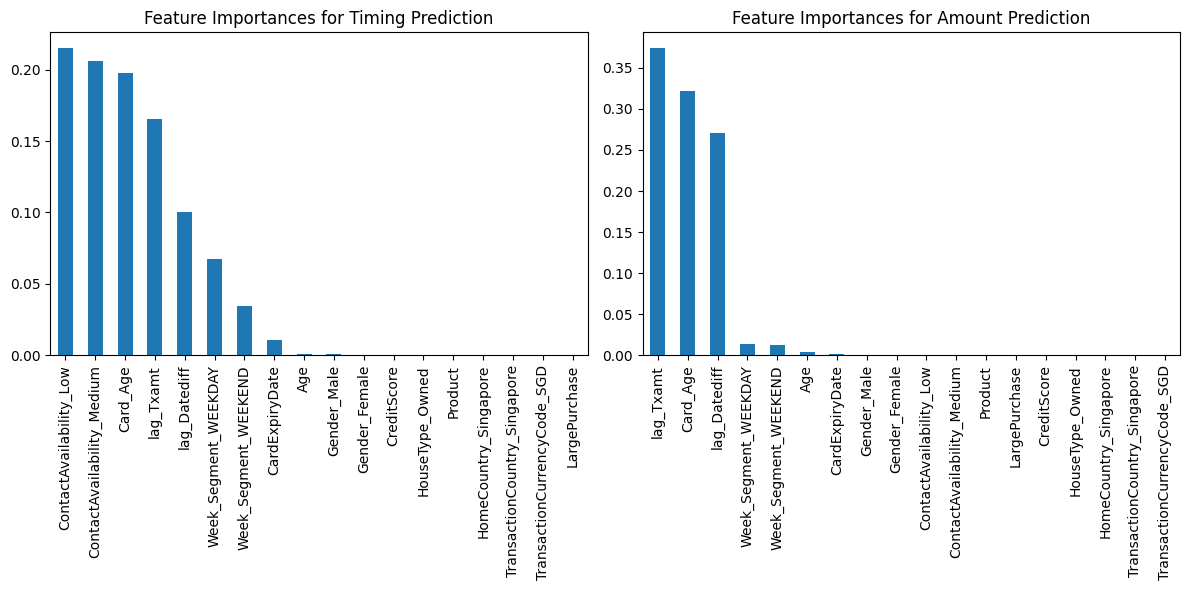

In [8]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define the Random Forest model
rf_model_timing = RandomForestRegressor()
rf_model_amount = RandomForestRegressor()

# Fit the model to the data for timing prediction
rf_model_timing.fit(X_timing, y_timing)

# Fit the model to the data for amount prediction
rf_model_amount.fit(X_amount, y_amount)

# Get feature importances for timing prediction
feature_importances_timing = pd.Series(rf_model_timing.feature_importances_, index=X_timing.columns)
# Get feature importances for amount prediction
feature_importances_amount = pd.Series(rf_model_amount.feature_importances_, index=X_amount.columns)

# Rank features based on importance for timing prediction
ranked_features_timing = feature_importances_timing.sort_values(ascending=False)

# Rank features based on importance for amount prediction
ranked_features_amount = feature_importances_amount.sort_values(ascending=False)

# Display ranked features
print("Ranked Features for Timing Prediction:")
print(ranked_features_timing)

print("\nRanked Features for Amount Prediction:")
print(ranked_features_amount)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ranked_features_timing.plot(kind='bar', title='Feature Importances for Timing Prediction')
plt.subplot(1, 2, 2)
ranked_features_amount.plot(kind='bar', title='Feature Importances for Amount Prediction')
plt.tight_layout()
plt.show()


In [9]:
# Identify features with zero importance for timing prediction
zero_importance_features_timing = feature_importances_timing[feature_importances_timing == 0].index

# Drop zero-importance features from the timing dataset
X_timing_cleaned = X_timing.drop(columns=zero_importance_features_timing)

# Repeat for amount prediction
zero_importance_features_amount = feature_importances_amount[feature_importances_amount == 0].index
X_amount_cleaned = X_amount.drop(columns=zero_importance_features_amount)


Correlation Matrix for Timing Prediction:


,Age,CardExpiryDate,Card_Age,lag_Datediff,lag_Txamt,Gender_Female,Gender_Male,ContactAvailability_Low,ContactAvailability_Medium,Week_Segment_WEEKDAY,Week_Segment_WEEKEND
Age,1.000000,-0.566828,-0.709117,0.340684,-0.067050,0.546644,-0.546644,0.377833,-0.377833,-0.086043,0.086043
CardExpiryDate,-0.566828,1.000000,0.281617,0.000639,0.060393,-0.999392,0.999392,-0.015189,0.015189,0.140196,-0.140196
Card_Age,-0.709117,0.281617,1.000000,-0.337795,-0.027532,-0.266884,0.266884,-0.248790,0.248790,0.009010,-0.009010
lag_Datediff,0.340684,0.000639,-0.337795,1.000000,-0.033989,-0.023483,0.023483,0.636094,-0.636094,-0.127622,0.127622
lag_Txamt,-0.067050,0.060393,-0.027532,-0.033989,1.000000,-0.059458,0.059458,-0.018806,0.018806,-0.036064,0.036064
Gender_Female,0.546644,-0.999392,-0.266884,-0.023483,-0.059458,1.000000,-1.000000,-0.017686,0.017686,-0.139092,0.139092
Gender_Male,-0.546644,0.999392,0.266884,0.023483,0.059458,-1.000000,1.000000,0.017686,-0.017686,0.139092,-0.139092
ContactAvailability_Low,0.377833,-0.015189,-0.248790,0.636094,-0.018806,-0.017686,0.017686,1.000000,-1.000000,-0.067310,0.067310
ContactAvailability_Medium,-0.377833,0.015189,0.248790,-0.636094,0.018806,0.017686,-0.017686,-1.000000,1.000000,0.067310,-0.067310
Week_Segment_WEEKDAY,-0.086043,0.140196,0.009010,-0.127622,-0.036064,-0.139092,0.139092,-0.067310,0.067310,1.000000,-1.000000


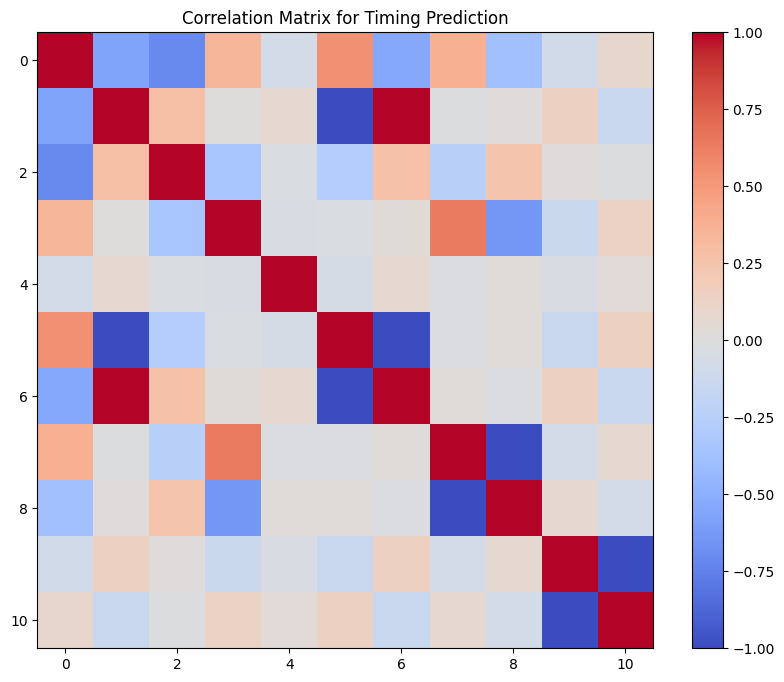


Correlation Matrix for Amount Prediction:


,Age,CardExpiryDate,Card_Age,lag_Datediff,lag_Txamt,Gender_Female,Gender_Male,ContactAvailability_Low,ContactAvailability_Medium,Week_Segment_WEEKDAY,Week_Segment_WEEKEND
Age,1.000000,-0.566828,-0.709117,0.340684,-0.067050,0.546644,-0.546644,0.377833,-0.377833,-0.086043,0.086043
CardExpiryDate,-0.566828,1.000000,0.281617,0.000639,0.060393,-0.999392,0.999392,-0.015189,0.015189,0.140196,-0.140196
Card_Age,-0.709117,0.281617,1.000000,-0.337795,-0.027532,-0.266884,0.266884,-0.248790,0.248790,0.009010,-0.009010
lag_Datediff,0.340684,0.000639,-0.337795,1.000000,-0.033989,-0.023483,0.023483,0.636094,-0.636094,-0.127622,0.127622
lag_Txamt,-0.067050,0.060393,-0.027532,-0.033989,1.000000,-0.059458,0.059458,-0.018806,0.018806,-0.036064,0.036064
Gender_Female,0.546644,-0.999392,-0.266884,-0.023483,-0.059458,1.000000,-1.000000,-0.017686,0.017686,-0.139092,0.139092
Gender_Male,-0.546644,0.999392,0.266884,0.023483,0.059458,-1.000000,1.000000,0.017686,-0.017686,0.139092,-0.139092
ContactAvailability_Low,0.377833,-0.015189,-0.248790,0.636094,-0.018806,-0.017686,0.017686,1.000000,-1.000000,-0.067310,0.067310
ContactAvailability_Medium,-0.377833,0.015189,0.248790,-0.636094,0.018806,0.017686,-0.017686,-1.000000,1.000000,0.067310,-0.067310
Week_Segment_WEEKDAY,-0.086043,0.140196,0.009010,-0.127622,-0.036064,-0.139092,0.139092,-0.067310,0.067310,1.000000,-1.000000


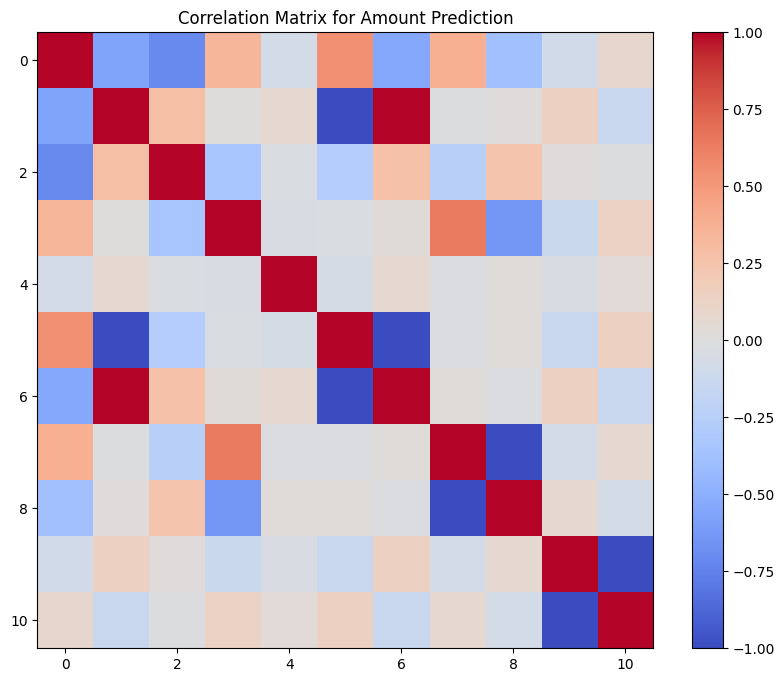

In [10]:
# Calculate and print correlations for timing prediction
correlation_matrix_timing = X_timing_cleaned.corr()
print("Correlation Matrix for Timing Prediction:")
display(correlation_matrix_timing)

# Visualize the correlation matrix for timing prediction
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix for Timing Prediction')
plt.imshow(correlation_matrix_timing, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.show()

# Repeat for amount prediction
# Calculate and print correlations for amount prediction
correlation_matrix_amount = X_amount_cleaned.corr()
print("\nCorrelation Matrix for Amount Prediction:")
display(correlation_matrix_amount)

# Visualize the correlation matrix for amount prediction
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix for Amount Prediction')
plt.imshow(correlation_matrix_amount, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.show()



In [11]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

# Separate features and target variable for timing prediction
X_timing = sample_case2_data_encoded.drop(['AccountNo', 'TransactionAmount'], axis=1)
y_timing = sample_case2_data_encoded['lag_Datediff']

# Separate features and target variable for amount prediction
X_amount = sample_case2_data_encoded.drop(['AccountNo', 'lag_Datediff'], axis=1)
y_amount = sample_case2_data_encoded['TransactionAmount']

# Standardize the features using the same scaler instance
scaler_timing = StandardScaler()
X_timing_standardized = scaler_timing.fit_transform(X_timing)

# Split the data into training and testing sets for timing prediction
X_timing_train, X_timing_test, y_timing_train, y_timing_test = train_test_split(X_timing_standardized, y_timing, test_size=0.2, random_state=42)

# Standardize the features for amount prediction using the same scaler instance
scaler_amount = StandardScaler()
X_amount_standardized = scaler_amount.fit_transform(X_amount)

# Split the data into training and testing sets for amount prediction
X_amount_train, X_amount_test, y_amount_train, y_amount_test = train_test_split(X_amount_standardized, y_amount, test_size=0.2, random_state=42)

# Define a simple neural network model for timing prediction
timing_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_timing_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1) 
])

# Compile the model
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
timing_model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with EarlyStopping callback
timing_model.fit(X_timing_train, y_timing_train, epochs=100, batch_size=64, validation_data=(X_timing_test, y_timing_test), callbacks=[early_stopping])

# Define a simple neural network model for amount prediction
amount_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_amount_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the amount model
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
amount_model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# Define EarlyStopping callback for amount model
early_stopping_amount = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the amount model with EarlyStopping callback
amount_model.fit(X_amount_train, y_amount_train, epochs=100, batch_size=64, validation_data=(X_amount_test, y_amount_test), callbacks=[early_stopping_amount])





Epoch 1/100

2/2 [==============================] - 3s 609ms/step - loss: 721.8494 - val_loss: 23.7658
Epoch 2/100
2/2 [==============================] - 0s 82ms/step - loss: 724.6749 - val_loss: 23.2630
Epoch 3/100
2/2 [==============================] - 0s 83ms/step - loss: 723.5871 - val_loss: 22.7991
Epoch 4/100
2/2 [==============================] - 0s 64ms/step - loss: 712.5820 - val_loss: 22.3577
Epoch 5/100
2/2 [==============================] - 0s 82ms/step - loss: 707.9698 - val_loss: 21.9012
Epoch 6/100
2/2 [==============================] - 0s 83ms/step - loss: 692.7582 - val_loss: 21.4587
Epoch 7/100
2/2 [==============================] - 0s 74ms/step - loss: 706.3444 - val_loss: 21.0469
Epoch 8/100
2/2 [==============================] - 0s 71ms/step - loss: 711.4073 - val_loss: 20.6375
Epoch 9/100
2/2 [==============================] - 0s 94ms/step - loss: 699.6532 - val_loss: 20.2333
Epoch 10/100
2/2 [==============================] - 0s 82ms/step - loss: 696.4824 - val

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
timing_predictions = timing_model.predict(X_timing_test)
amount_predictions = amount_model.predict(X_amount_test)

# Evaluate timing model
timing_mse = mean_squared_error(y_timing_test, timing_predictions)
timing_mae = mean_absolute_error(y_timing_test, timing_predictions)
print(f'Timing MSE: {timing_mse:.4f}, Timing MAE: {timing_mae:.4f}')

# Evaluate amount model
amount_mse = mean_squared_error(y_amount_test, amount_predictions)
amount_mae = mean_absolute_error(y_amount_test, amount_predictions)
print(f'Amount MSE: {amount_mse:.4f}, Amount MAE: {amount_mae:.4f}')

1/1 [==============================] - 0s 126ms/step
Timing MSE: 14.9961, Timing MAE: 3.2228
Amount MSE: 1934.8242, Amount MAE: 29.3810


In [13]:
# Predict timing using the timing model
timing_predictions = timing_model.predict(X_timing_test)

# Predict amount using the amount model
amount_predictions = amount_model.predict(X_amount_test)

# Print the top 5 timing predictions and actual values
print("Top 5 Timing Predictions:")
print(timing_predictions[:5])

# Print the top 5 amount predictions and actual values
print("\nTop 5 Amount Predictions:")
print(amount_predictions[:5])



1/1 [==============================] - 0s 50ms/step
Top 5 Timing Predictions:
[[3.5335412]
 [3.5898592]
 [3.8654883]
 [3.0467446]
 [2.1508574]]

Top 5 Amount Predictions:
[[55.527527]
 [14.900651]
 [20.79416 ]
 [ 6.190212]
 [15.128842]]


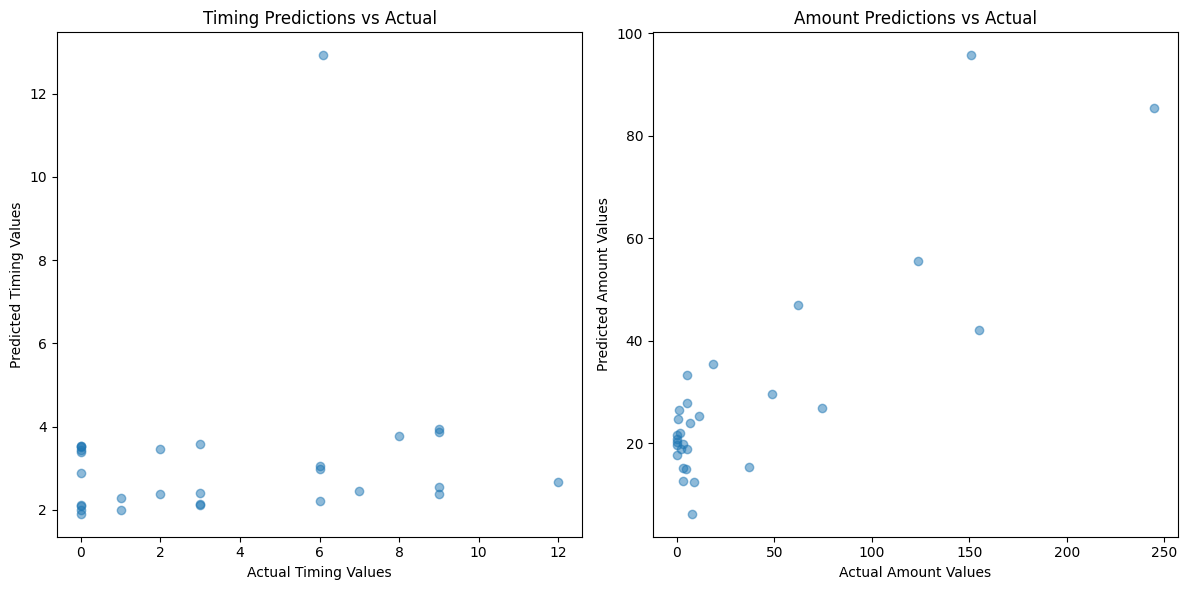

In [14]:
import matplotlib.pyplot as plt

# Plotting Timing Predictions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_timing_test, timing_predictions, alpha=0.5)
plt.title('Timing Predictions vs Actual')
plt.xlabel('Actual Timing Values')
plt.ylabel('Predicted Timing Values')

# Plotting Amount Predictions
plt.subplot(1, 2, 2)
plt.scatter(y_amount_test, amount_predictions, alpha=0.5)
plt.title('Amount Predictions vs Actual')
plt.xlabel('Actual Amount Values')
plt.ylabel('Predicted Amount Values')

plt.tight_layout()
plt.show()


In [15]:
import pandas as pd

# Create DataFrames for Timing Predictions and Actual Values
timing_results = pd.DataFrame({'Actual': y_timing_test, 'Predicted': timing_predictions.flatten()})

# Create DataFrames for Amount Predictions and Actual Values
amount_results = pd.DataFrame({'Actual': y_amount_test, 'Predicted': amount_predictions.flatten()})

# Display the top 5 rows for each DataFrame
print("Timing Predictions:")
print(timing_results.head())

print("\nAmount Predictions:")
print(amount_results.head())


Timing Predictions:
     Actual  Predicted
68      0.0   3.533541
108     3.0   3.589859
31      9.0   3.865488
51      6.0   3.046745
95      3.0   2.150857

Amount Predictions:
      Actual  Predicted
68   124.000  55.527527
108    4.836  14.900651
31     0.000  20.794161
51     8.060   6.190212
95     3.348  15.128842


In [16]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

# Separate features and target variable for timing prediction
X_timing = sample_case2_data_encoded.drop(['AccountNo', 'TransactionAmount'], axis=1)
y_timing = sample_case2_data_encoded['lag_Datediff']

# Separate features and target variable for amount prediction
X_amount = sample_case2_data_encoded.drop(['AccountNo', 'lag_Datediff'], axis=1)
y_amount = sample_case2_data_encoded['TransactionAmount']

# Standardize the features using the same scaler instance
scaler_timing = StandardScaler()
X_timing_standardized = scaler_timing.fit_transform(X_timing)

# Split the data into training and testing sets for timing prediction
X_timing_train, X_timing_test, y_timing_train, y_timing_test = train_test_split(X_timing_standardized, y_timing, test_size=0.2, random_state=42)

# Standardize the features for amount prediction using the same scaler instance
scaler_amount = StandardScaler()
X_amount_standardized = scaler_amount.fit_transform(X_amount)

# Split the data into training and testing sets for amount prediction
X_amount_train, X_amount_test, y_amount_train, y_amount_test = train_test_split(X_amount_standardized, y_amount, test_size=0.2, random_state=42)

# Define a more complex neural network model for timing prediction
timing_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_timing_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1) 
])

# Compile the timing model
custom_optimizer_timing = tf.keras.optimizers.Adam(learning_rate=0.001)
timing_model.compile(optimizer=custom_optimizer_timing, loss='mean_squared_error')

# Define EarlyStopping callback for timing model
early_stopping_timing = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the timing model with EarlyStopping callback
timing_model.fit(X_timing_train, y_timing_train, epochs=150, batch_size=64, validation_data=(X_timing_test, y_timing_test), callbacks=[early_stopping_timing])

# Build the amount model before training
amount_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_amount_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1) 
])
amount_model.build((None, X_amount_train.shape[1]))

# Compile the amount model with a different optimizer instance
custom_optimizer_amount = tf.keras.optimizers.Adam(learning_rate=0.001)
amount_model.compile(optimizer=custom_optimizer_amount, loss='mean_squared_error')

# Define EarlyStopping callback for amount model
early_stopping_amount = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the amount model with EarlyStopping callback
amount_model.fit(X_amount_train, y_amount_train, epochs=150, batch_size=64, validation_data=(X_amount_test, y_amount_test), callbacks=[early_stopping_amount])


Epoch 1/150
2/2 [==============================] - 3s 437ms/step - loss: 742.2246 - val_loss: 26.1824
Epoch 2/150
2/2 [==============================] - 0s 60ms/step - loss: 736.3829 - val_loss: 25.5114
Epoch 3/150
2/2 [==============================] - 0s 72ms/step - loss: 756.6764 - val_loss: 24.9065
Epoch 4/150
2/2 [==============================] - 0s 147ms/step - loss: 732.9982 - val_loss: 24.3643
Epoch 5/150
2/2 [==============================] - 0s 100ms/step - loss: 694.8633 - val_loss: 23.8602
Epoch 6/150
2/2 [==============================] - 0s 74ms/step - loss: 734.5956 - val_loss: 23.3702
Epoch 7/150
2/2 [==============================] - 0s 74ms/step - loss: 736.6962 - val_loss: 22.8860
Epoch 8/150
2/2 [==============================] - 0s 63ms/step - loss: 662.3821 - val_loss: 22.4129
Epoch 9/150
2/2 [==============================] - 0s 70ms/step - loss: 683.4355 - val_loss: 21.9406
Epoch 10/150
2/2 [==============================] - 0s 83ms/step - loss: 728.1292 - val_

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluate timing model
timing_mse = mean_squared_error(y_timing_test, timing_predictions)
timing_mae = mean_absolute_error(y_timing_test, timing_predictions)
print(f'Timing MSE: {timing_mse:.4f}, Timing MAE: {timing_mae:.4f}')

# Evaluate amount model
amount_mse = mean_squared_error(y_amount_test, amount_predictions)
amount_mae = mean_absolute_error(y_amount_test, amount_predictions)
print(f'Amount MSE: {amount_mse:.4f}, Amount MAE: {amount_mae:.4f}')

Timing MSE: 14.9961, Timing MAE: 3.2228
Amount MSE: 1934.8242, Amount MAE: 29.3810


In [21]:
import pandas as pd

# Create DataFrames for Timing Predictions and Actual Values
timing_results = pd.DataFrame({'Actual': y_timing_test, 'Predicted': timing_predictions.flatten()})

# Create DataFrames for Amount Predictions and Actual Values
amount_results = pd.DataFrame({'Actual': y_amount_test, 'Predicted': amount_predictions.flatten()})

# Display the top 5 rows for each DataFrame
print("Timing Predictions:")
print(timing_results.head())

print("\nAmount Predictions:")
print(amount_results.head())

Timing Predictions:
     Actual  Predicted
68      0.0   3.533541
108     3.0   3.589859
31      9.0   3.865488
51      6.0   3.046745
95      3.0   2.150857

Amount Predictions:
      Actual  Predicted
68   124.000  55.527527
108    4.836  14.900651
31     0.000  20.794161
51     8.060   6.190212
95     3.348  15.128842


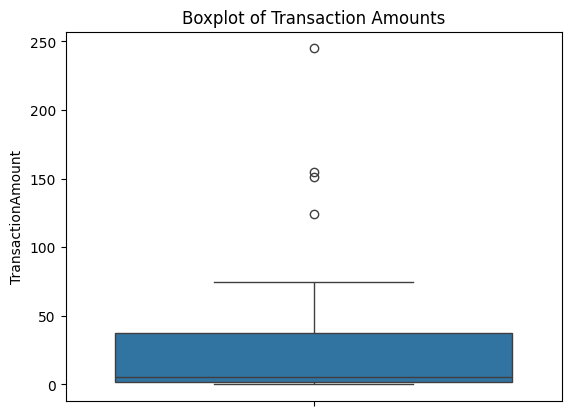

In [22]:
# Check for outliers in amount prediction data
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_amount_test is your true target values
sns.boxplot(y_amount_test)
plt.title("Boxplot of Transaction Amounts")
plt.show()


In [23]:
import numpy as np

# Log-transform the target variable
y_amount_train_log = np.log1p(y_amount_train)
y_amount_test_log = np.log1p(y_amount_test)

# Define and compile the model for amount prediction with log-transformed target
log_amount_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_amount_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
log_amount_model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# Define EarlyStopping callback for amount model
early_stopping_amount_log = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with log-transformed target
log_amount_model.fit(X_amount_train, y_amount_train_log, epochs=100, batch_size=64, validation_data=(X_amount_test, y_amount_test_log), callbacks=[early_stopping_amount_log])

# Make predictions on test data
y_amount_pred_log = log_amount_model.predict(X_amount_test)

# Convert predictions back to the original scale
y_amount_pred = np.expm1(y_amount_pred_log)

# Evaluate the model
mse_amount_log = mean_squared_error(y_amount_test, y_amount_pred)
mae_amount_log = mean_absolute_error(y_amount_test, y_amount_pred)

print("Log-Transformed Amount Prediction Metrics:")
print("Mean Squared Error:", mse_amount_log)
print("Mean Absolute Error:", mae_amount_log)


Epoch 1/100
2/2 [==============================] - 2s 300ms/step - loss: 5.8279 - val_loss: 6.7533
Epoch 2/100
2/2 [==============================] - 0s 63ms/step - loss: 5.5059 - val_loss: 6.4778
Epoch 3/100
2/2 [==============================] - 0s 89ms/step - loss: 5.5495 - val_loss: 6.2063
Epoch 4/100
2/2 [==============================] - 0s 148ms/step - loss: 5.1256 - val_loss: 5.9415
Epoch 5/100
2/2 [==============================] - 0s 146ms/step - loss: 4.8933 - val_loss: 5.6808
Epoch 6/100
2/2 [==============================] - 0s 91ms/step - loss: 4.4962 - val_loss: 5.4205
Epoch 7/100
2/2 [==============================] - 0s 99ms/step - loss: 4.1845 - val_loss: 5.1587
Epoch 8/100
2/2 [==============================] - 0s 88ms/step - loss: 4.0580 - val_loss: 4.9067
Epoch 9/100
2/2 [==============================] - 0s 100ms/step - loss: 3.8116 - val_loss: 4.6580
Epoch 10/100
2/2 [==============================] - 0s 83ms/step - loss: 3.8412 - val_loss: 4.4203
Epoch 11/100
2/

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest regressor model
amount_model_tuned = RandomForestRegressor()

# Define the scoring metric (negative mean squared error)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform grid search with cross-validation
grid_search = GridSearchCV(amount_model_tuned, param_grid, cv=5, scoring=scorer)
grid_search.fit(X_amount_train, y_amount_train_log)

# Get the best parameters
best_params_tuned = grid_search.best_params_
print("Best Hyperparameters:", best_params_tuned)

# Train the model with the best parameters
best_amount_model_tuned = grid_search.best_estimator_
best_amount_model_tuned.fit(X_amount_train, y_amount_train_log)

# Make predictions on test data
y_amount_pred_log_tuned = best_amount_model_tuned.predict(X_amount_test)

# Convert predictions back to the original scale
y_amount_pred_tuned = np.expm1(y_amount_pred_log_tuned)

# Evaluate the tuned model
mse_amount_tuned = mean_squared_error(y_amount_test, y_amount_pred_tuned)
mae_amount_tuned = mean_absolute_error(y_amount_test, y_amount_pred_tuned)

print("Tuned Log-Transformed Amount Prediction Metrics:")
print("Mean Squared Error:", mse_amount_tuned)
print("Mean Absolute Error:", mae_amount_tuned)


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Tuned Log-Transformed Amount Prediction Metrics:
Mean Squared Error: 21.446195547371158
Mean Absolute Error: 2.01787045817486


In [38]:
import pandas as pd

# Create DataFrames for Timing Predictions and Actual Values
timing_results = pd.DataFrame({'Actual': y_timing_test, 'Predicted': timing_predictions.flatten()})

# Display the top 5 rows for each DataFrame
print("Timing Predictions:")
print(timing_results.head())



Timing Predictions:
     Actual  Predicted
68      0.0   3.533541
108     3.0   3.589859
31      9.0   3.865488
51      6.0   3.046745
95      3.0   2.150857


In [40]:
import pandas as pd

# Create DataFrames for Amount Predictions and Actual Values
amount_results = pd.DataFrame({'Actual': y_amount_test, 'Predicted': y_amount_pred_tuned})

# Display the top 5 rows for each DataFrame
print("Amount Predictions:")
print(amount_results.head())

Amount Predictions:
      Actual   Predicted
68   124.000  120.261494
108    4.836    4.868098
31     0.000    0.006584
51     8.060    7.967358
95     3.348    3.106762
